<a href="https://colab.research.google.com/github/linda-farias/Execucao_read_qc.ipynb/blob/main/Execucao_read_qc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the essential first step to using the miniconda within of the Google Colab.

source: https://github.com/dataprofessor/code/blob/master/python/google_colab_install_conda.ipynb

In [ ]:
!wget https://repo.continuum.io/miniconda/Miniconda2-latest-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
!bash Miniconda2-latest-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-06-01 15:17:52--  https://repo.continuum.io/miniconda/Miniconda2-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda2-latest-Linux-x86_64.sh [following]
--2021-06-01 15:17:52--  https://repo.anaconda.com/miniconda/Miniconda2-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51093759 (49M) [application/x-sh]
Saving to: ‘Miniconda2-latest-Linux-x86_64.sh.1’

Miniconda2-latest-L 100%[===================>]  48.73M   193MB/s    in 0.3s    

2021-06-01 15:17:53 (193 MB/s) - ‘Miniconda2-latest-Lin

The next command line is needed to be able to access through code the Google Drive files, to be able to save the downloaded and processed samples after running metaWRAP.
When running it, you will be asked to access a link, where you will need to confirm your Google account, where a code will be generated.
Copy the code and place it in the requested field.


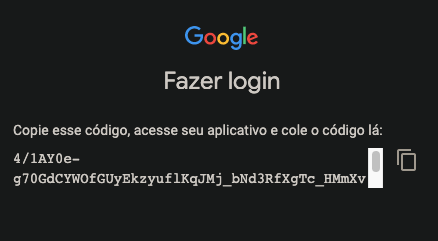

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In the next block, we activate the environment variables and install dependencies.

In [ ]:
!conda create -y -n metawrap-env python=2.7
!conda activate metawrap-env
!conda config --add channels defaults
!conda config --add channels conda-forge
!conda config --add channels bioconda
!conda config --add channels ursky

Solving environment: \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/metawrap-env

  added / updated specs:
    - python=2.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.25  |       h06a4308_1         112 KB
    certifi-2020.6.20          |     pyhd3eb1b0_3         155 KB
    libffi-3.3                 |       he6710b0_2          50 KB
    readline-8.1               |       h27cfd23_0         362 KB
    sqlite-3.35.4              |       hdfb4753_0         981 KB
    tk-8.6.10                  |       hbc83047_0         3.0 MB
   

Here we install metaWRAP and enable the environment variable

In [ ]:
!conda install -y -c ursky metawrap-mg
!activate metawrap-env

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

Finally, we run metaWRAP to see that it is working.

In [ ]:
!metawrap


------------------------------------------------------------------------------------------------------------------------
-----                                  Please select a proper module of metaWRAP.                                  -----
------------------------------------------------------------------------------------------------------------------------


MetaWRAP v=1.2.1
Usage: metaWRAP [module]

	Modules:
	read_qc		Raw read QC module (read trimming and contamination removal)
	assembly	Assembly module (metagenomic assembly)
	kraken		KRAKEN module (taxonomy annotation of reads and assemblies)
	blobology	Blobology module (GC vs Abund plots of contigs and bins)

	binning		Binning module (metabat, maxbin, or concoct)
	bin_refinement	Refinement of bins from binning module
	reassemble_bins Reassemble bins using metagenomic reads
	quant_bins	Quantify the abundance of each bin across samples
	classify_bins	Assign taxonomy to genomic bins
	annotate_bins	Functional annotation of draft g

Now we have everything set up and installed to use metaWRAP.

To run a test run, we can download some samples by running the following code block:

In [ ]:
!ls

drive				   Miniconda2-latest-Linux-x86_64.sh.1
Miniconda2-latest-Linux-x86_64.sh  sample_data


Two samples will be downloaded from the European Nucleotide Archive (ENA) in qz format. The first being foward and the other being reverse.

In [ ]:
!cd drive/MyDrive/Colab_READ_QC && wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR011/ERR011347/ERR011347_1.fastq.gz
!cd drive/MyDrive/Colab_READ_QC && wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR011/ERR011347/ERR011347_2.fastq.gz

These files are downloaded in the main folder of our Google Drive, compressed, and in order to extract them, we must execute the following commands:

In [ ]:
!cd drive/MyDrive/Colab_READ_QC && gunzip * .gz

gzip: Execucao_read_qc.ipynb: unknown suffix -- ignored
gzip: .gz.gz: No such file or directory


With the files downloaded and extracted, we can finally run the sample processing:

The command execution model we will use is as follows:


```
!metawrap read_qc --skip-bmtagger -1 <diretório da primeira parte da amostra> -2 <diretório da segunda parte da amostra> -o <diretório de saída do processamento>
```



In [ ]:
!metawrap read_qc --skip-bmtagger -1 drive/MyDrive/Colab_READ_QC/ERR011347_1.fastq -2 drive/MyDrive/Colab_READ_QC/ERR011347_2.fastq  -o drive/MyDrive/Colab_READ_QC/output

metawrap read_qc --skip-bmtagger -1 drive/MyDrive/Colab_READ_QC/ERR011347_1.fastq -2 drive/MyDrive/Colab_READ_QC/ERR011347_2.fastq -o drive/MyDrive/Colab_READ_QC/output

########################################################################################################################
#####                                             MAKING PRE-QC REPORT                                             #####
########################################################################################################################


------------------------------------------------------------------------------------------------------------------------
-----                   pre-qc report saved to: drive/MyDrive/Colab_READ_QC/output/pre-QC_report                   -----
------------------------------------------------------------------------------------------------------------------------


####################################################################################################

In the run performed here, the output directory will be in
`drive/MyDrive/Colab_READ_QC/output`
We can see the folder and its contents in the following code block: 

In [ ]:
!cd drive/MyDrive/Colab_READ_QC/output && ls

final_pure_reads_1.fastq  post-QC_report
final_pure_reads_2.fastq  pre-QC_report


We can see that two *fastq* files of the final samples and two report parts of the samples were generated before and after processing.
In the following code block, we can see the contents of the post-processing files folder:

In [ ]:
!cd drive/MyDrive/Colab_READ_QC/output/post-QC_report && ls

final_pure_reads_1_fastqc.html	final_pure_reads_2_fastqc.html


As we can see, two *HTML* files were generated, one for each part of the sample, these files can be opened by accessing Drive or using the following code blocks:

Measure,Value
Filename,final_pure_reads_1.fastq
File type,Conventional base calls
Encoding,Sanger / Illumina 1.9
Total Sequences,12079592
Sequences flagged as poor quality,0
Sequence length,20-75
%GC,44

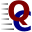
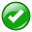
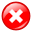
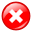
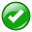
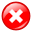
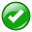
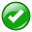
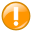
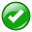
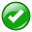
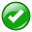
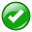
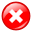
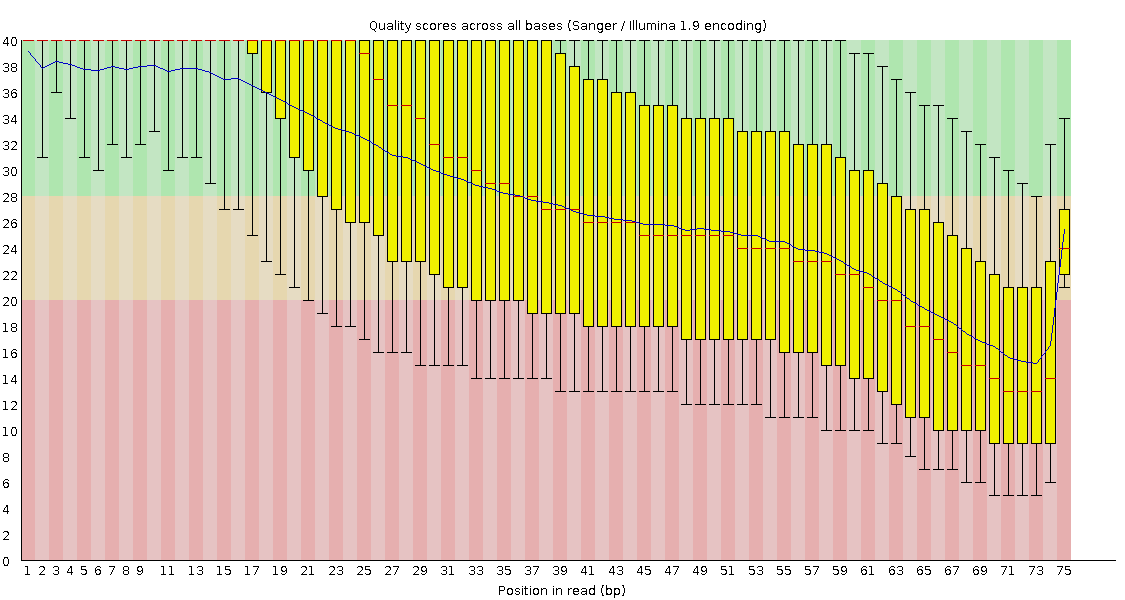
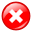
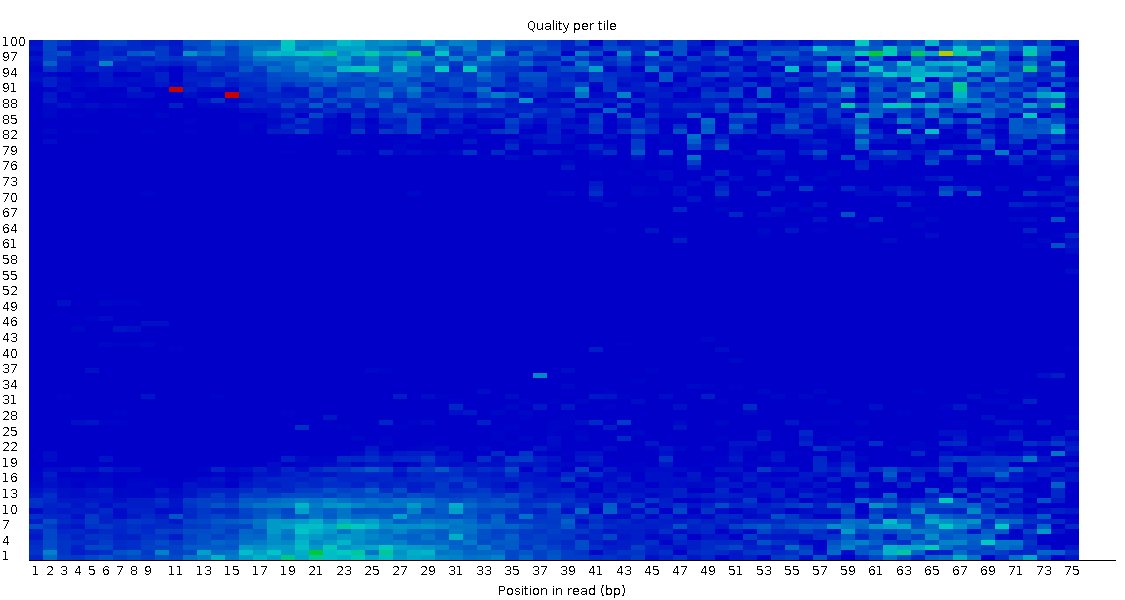
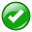
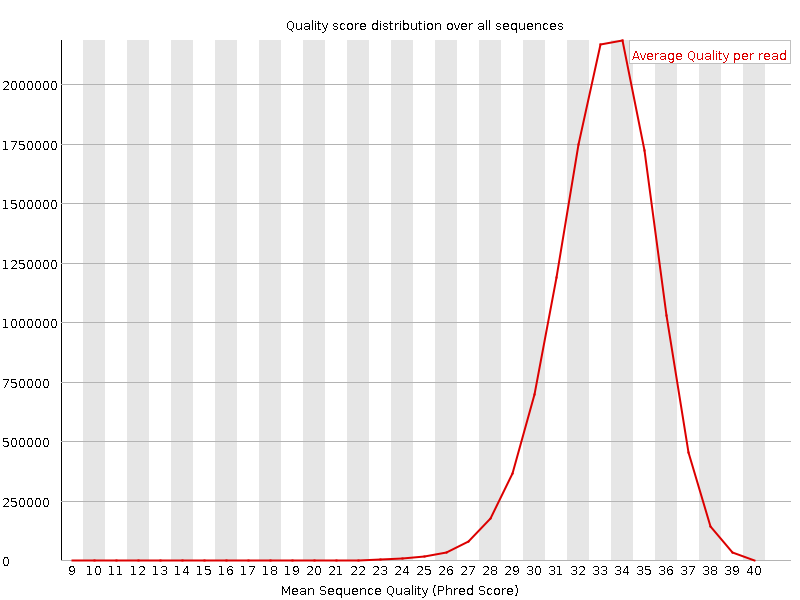
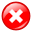
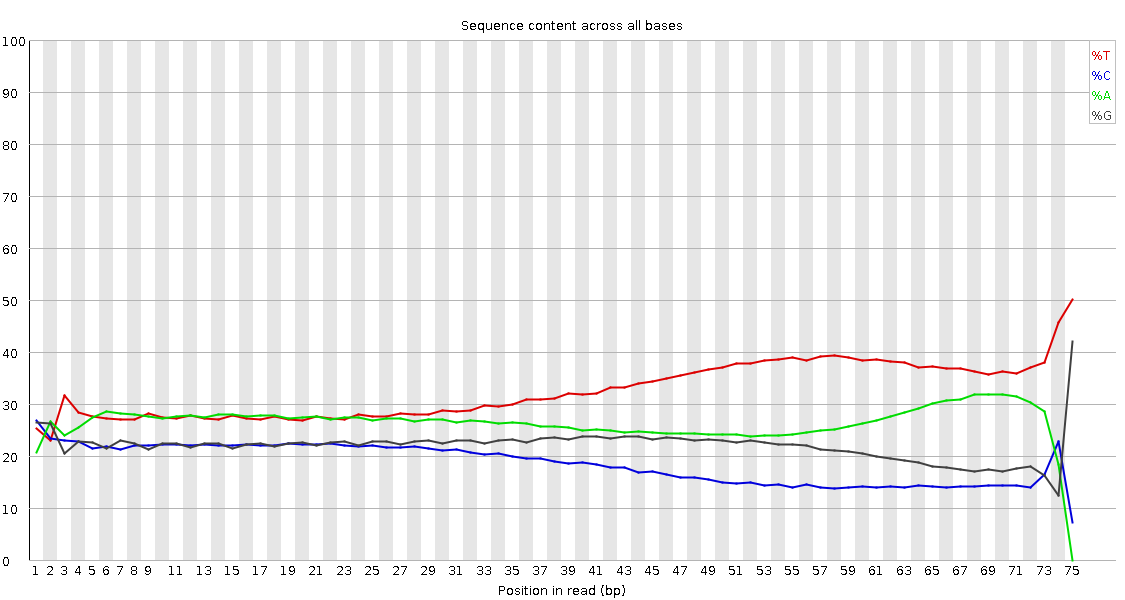
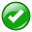
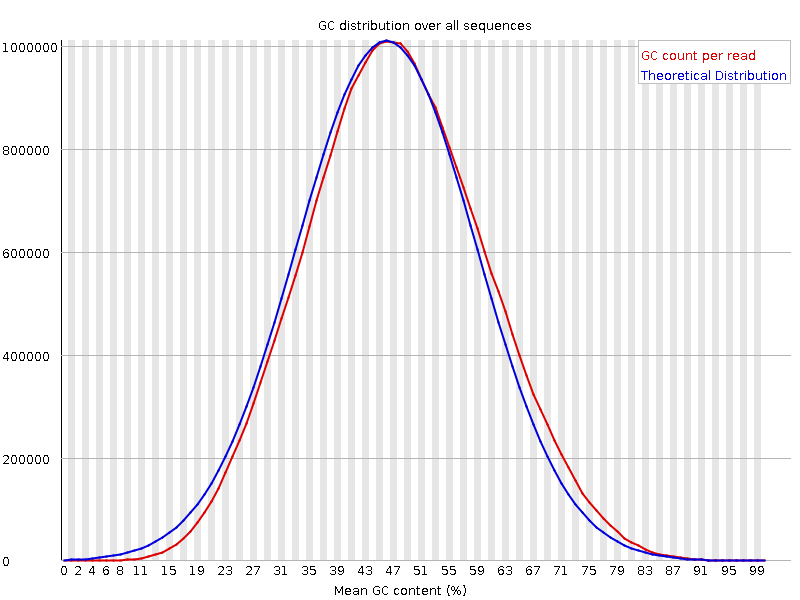
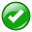
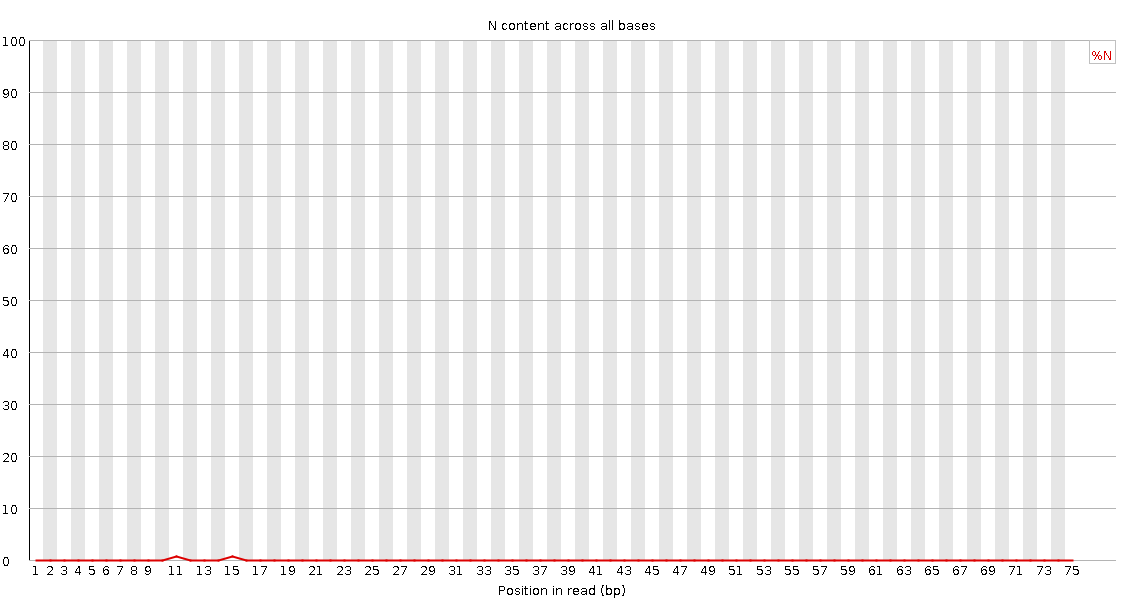
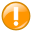
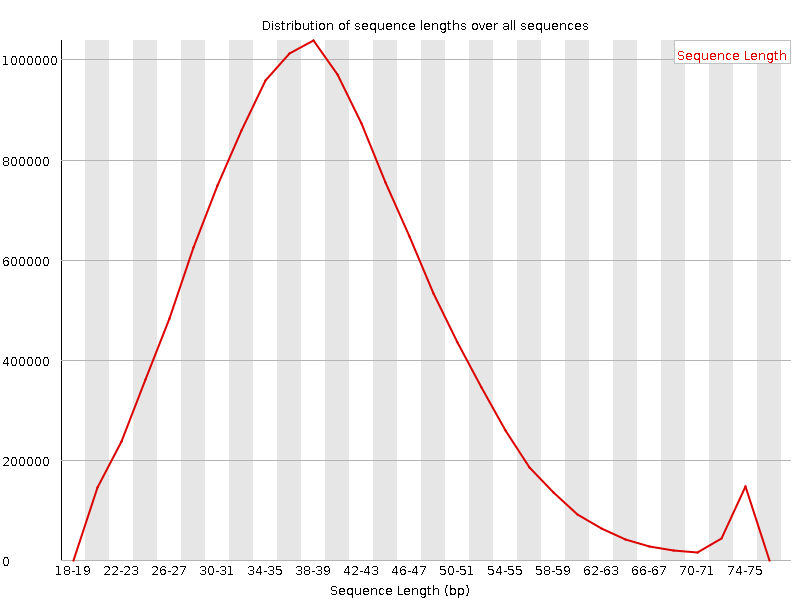
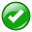
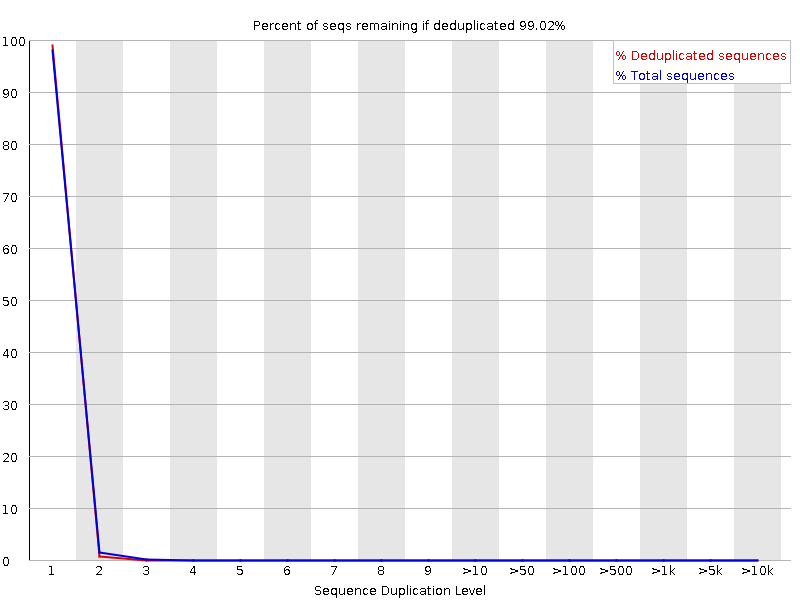
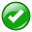
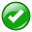
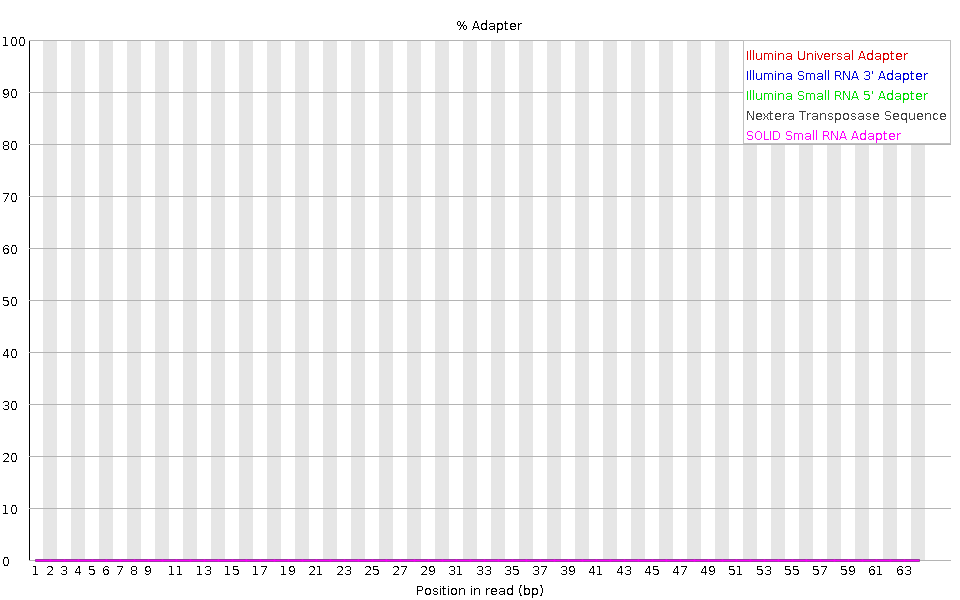

In [ ]:
print('\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')
import IPython
IPython.display.HTML(filename='drive/MyDrive/Colab_READ_QC/output/post-QC_report/final_pure_reads_1_fastqc.html')

Measure,Value
Filename,final_pure_reads_2.fastq
File type,Conventional base calls
Encoding,Sanger / Illumina 1.9
Total Sequences,12079592
Sequences flagged as poor quality,0
Sequence length,20-75
%GC,43

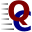
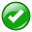
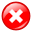
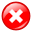
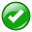
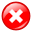
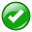
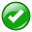
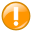
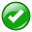
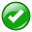
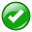
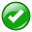
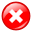
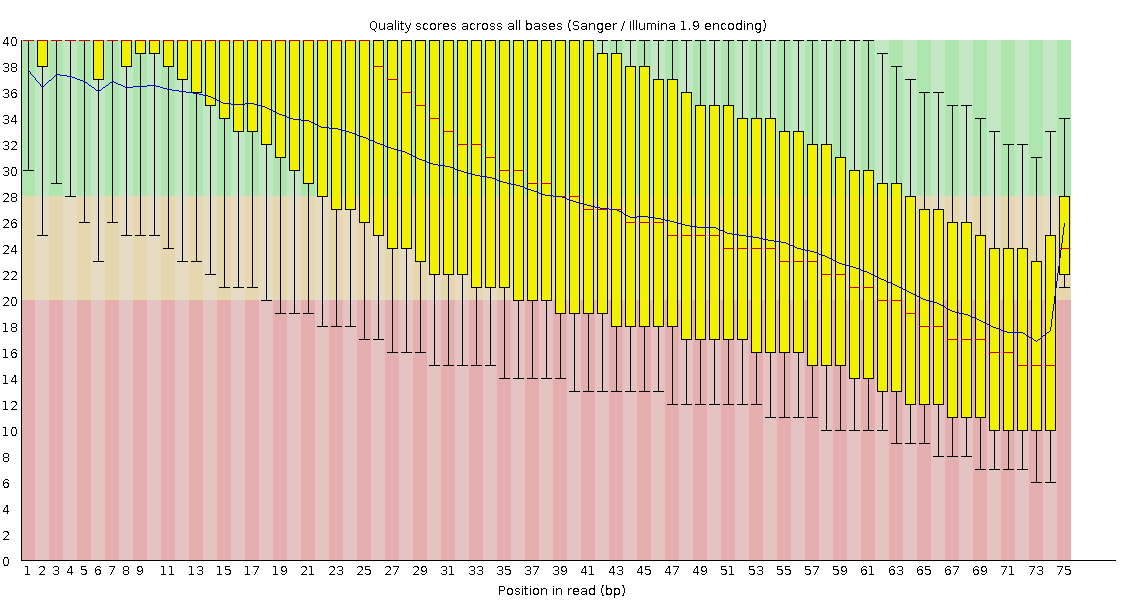
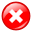
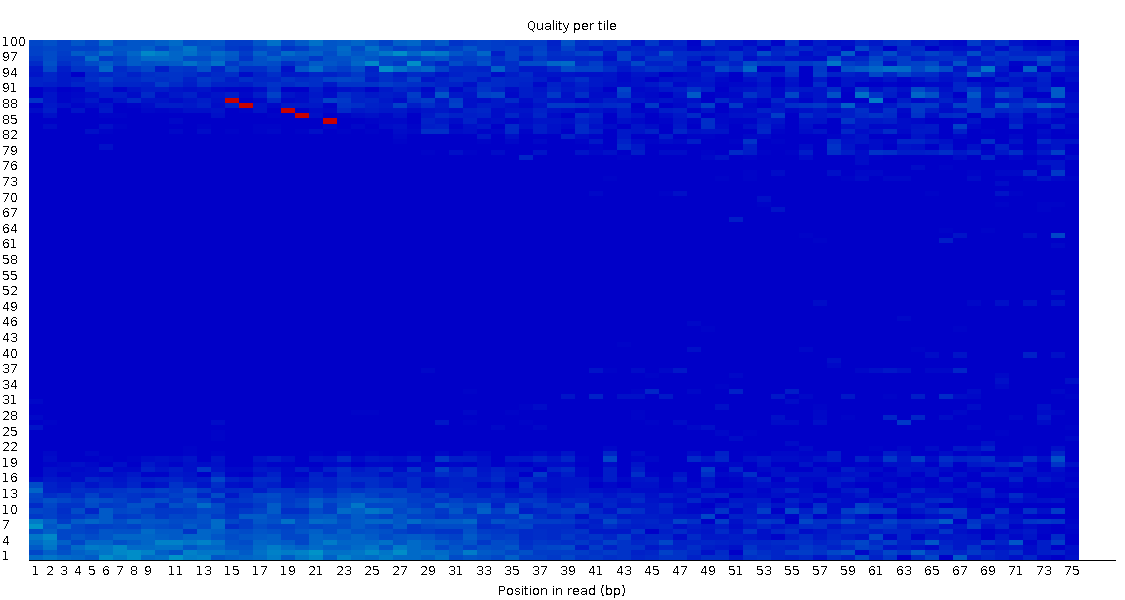
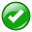
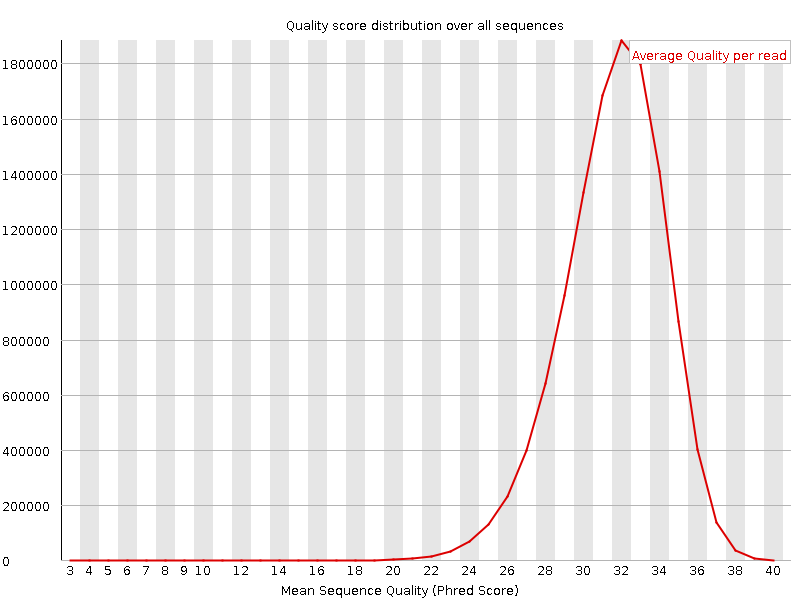
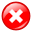
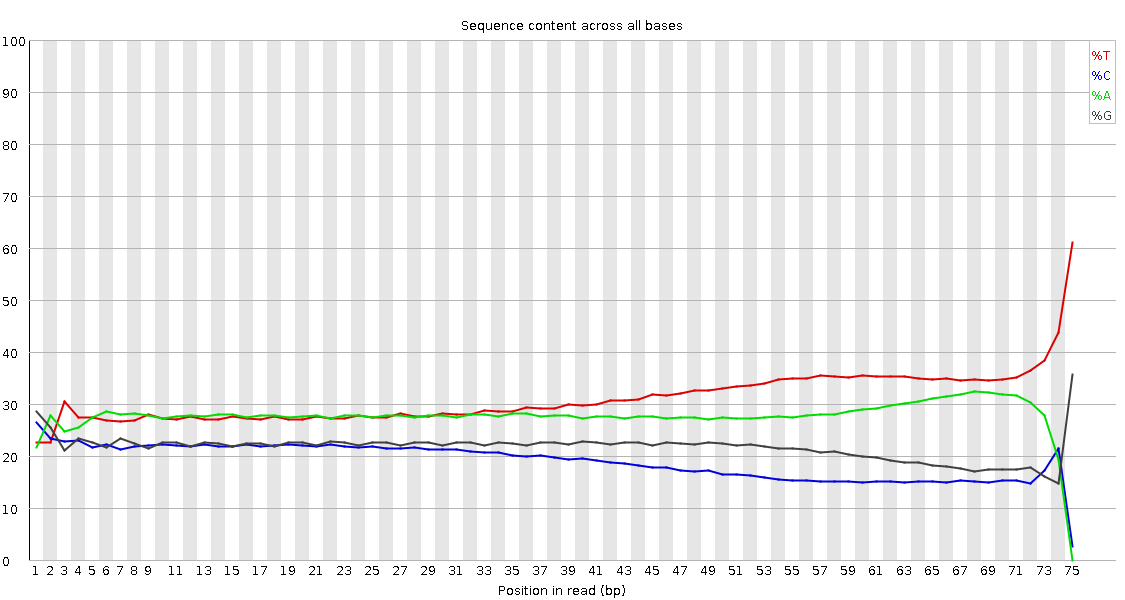
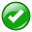
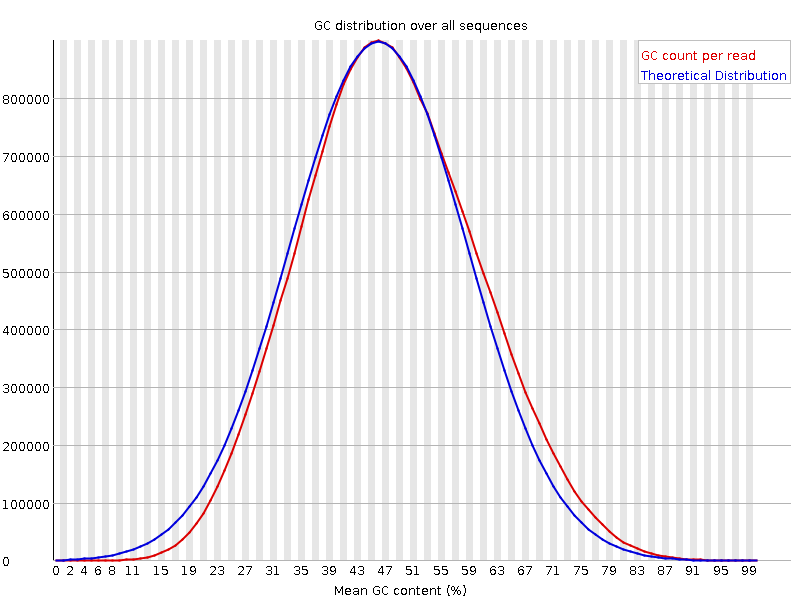
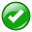
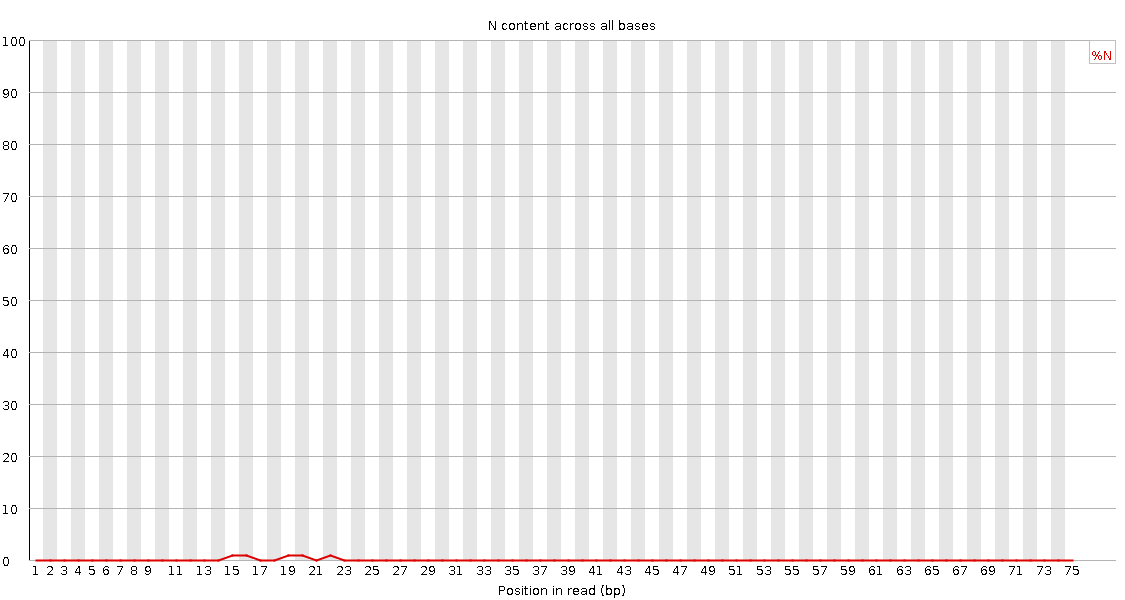
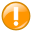
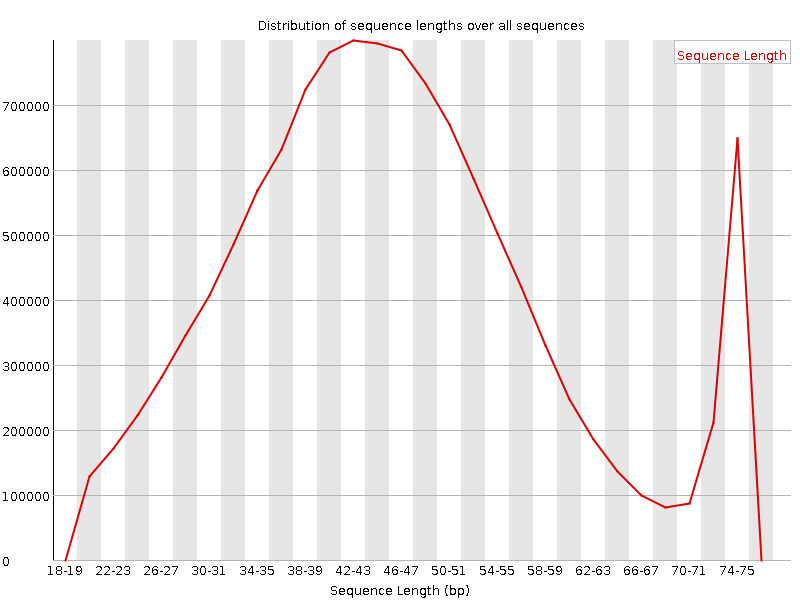
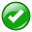
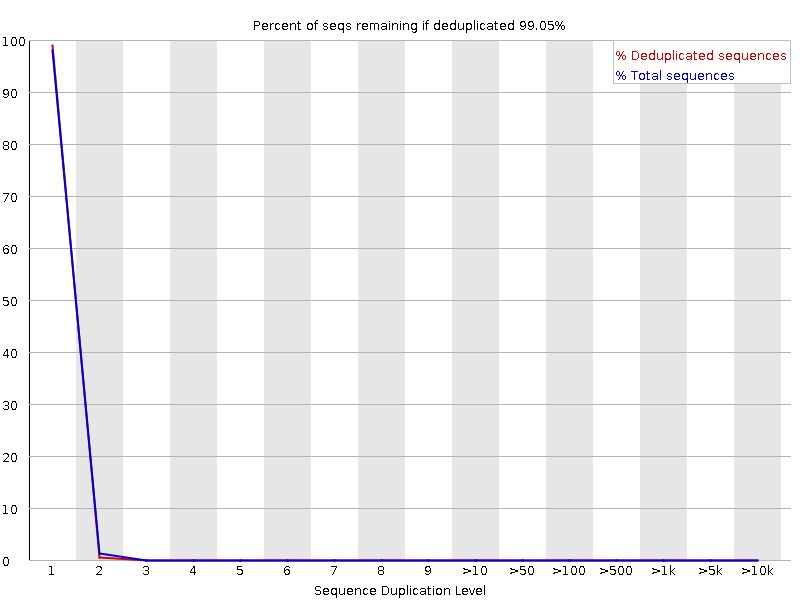
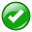
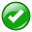
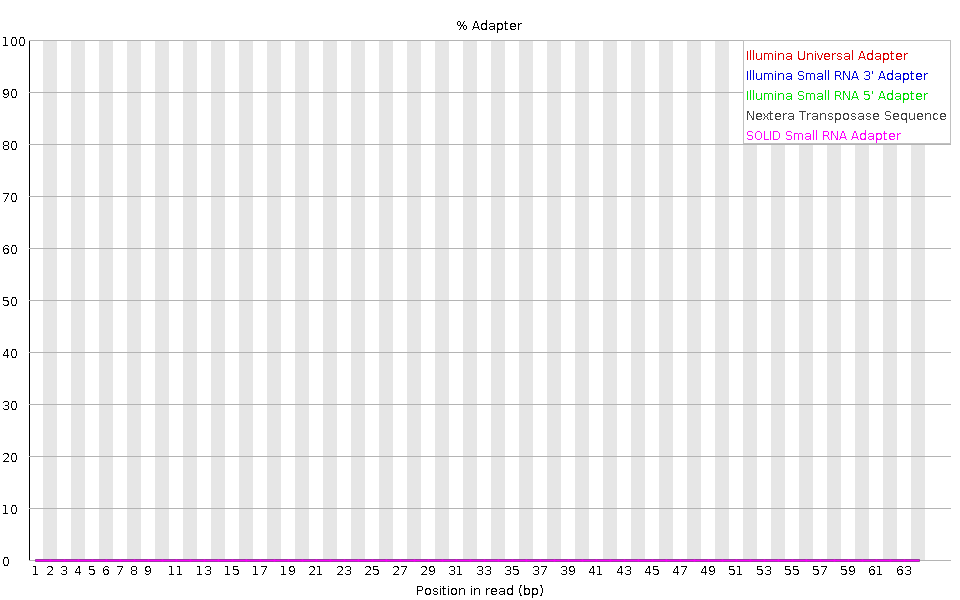

In [ ]:
print('\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')
import IPython
IPython.display.HTML(filename='drive/MyDrive/Colab_READ_QC/output/post-QC_report/final_pure_reads_2_fastqc.html')